# Amazon: 20 years of reviews

In [49]:
import pickle
import pandas as pd
import numpy as np
import fastparquet
import matplotlib.pyplot as plt

import pyarrow as pa
from fastparquet import ParquetFile
from collections import Counter
import seaborn as sns

%matplotlib inline

In [3]:
# IMPORTANT! I cleaned up the parquet directory and uploaded the new version here:
# https://drive.google.com/open?id=1CkC4OMzkUiwjt7un_K6jhMlBVD1L4t5o
# please download it and extract to the right directory. You can delete old parquet files.
PARQUET_DIR = './parquet/'

In [3]:
#US reviews by category
with open('category_reviews.pickle', 'rb') as file:
    category_reviews = pickle.load(file)

In [5]:
reviews = category_reviews[['category']]
reviews.head()

,category
0,Shoes
1,Mobile_Apps
2,Personal_Care_Appliances
3,Home_Improvement
4,Digital_Video_Download


In [4]:
def parquet_filename(category):
    """
    Returns the filename of parquet corresponding to the given caterogy.
    """
    return PARQUET_DIR + category + '.parquet.gzip'

# Use this function to load data!
def read_DataFrame(category):
    """
    Returns DataFrame corresponding to given category
    """
    return pd.read_parquet(parquet_filename(category))

In [7]:
read_DataFrame('Shoes').head()

,customer_id,review_id,product_parent,product_category,star_rating,helpful_votes,total_votes,review_date
0,18069663,R3P2HIOQCIN5ZU,265024781,Shoes,1,0,0,2015-08-31
1,16251825,R12VVR0WH5Q24V,259035853,Shoes,5,0,0,2015-08-31
2,20381037,RNCCKB6TV5EEF,666066660,Shoes,4,0,0,2015-08-31
3,108364,R2NZXYIVCGB13W,448483263,Shoes,5,0,6,2015-08-31
4,45449350,R2EQ1TG9IT3OEQ,7853171,Shoes,3,0,0,2015-08-31


## Explore categories

Let's check what category has the most reviews.

In [5]:
def review_count(category):
    """
    Count all reviews
    """
    return read_DataFrame(category).shape[0]

C:\Users\Gianni\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


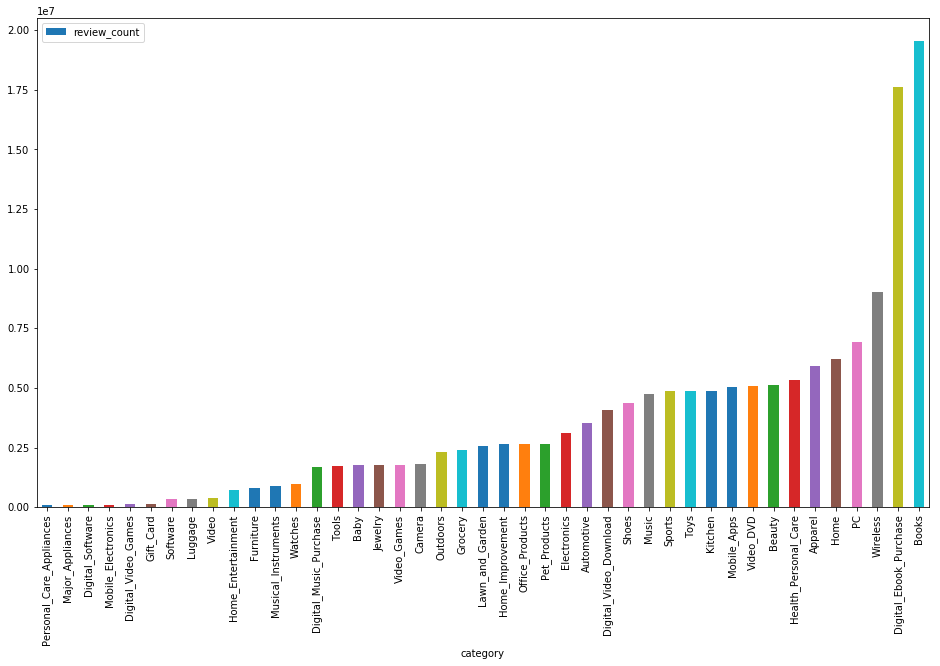

In [9]:
reviews['review_count'] = reviews['category'].apply(review_count)
reviews.sort_values("review_count").plot.bar(x='category', y='review_count', figsize=(16,9))

C:\Users\Gianni\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


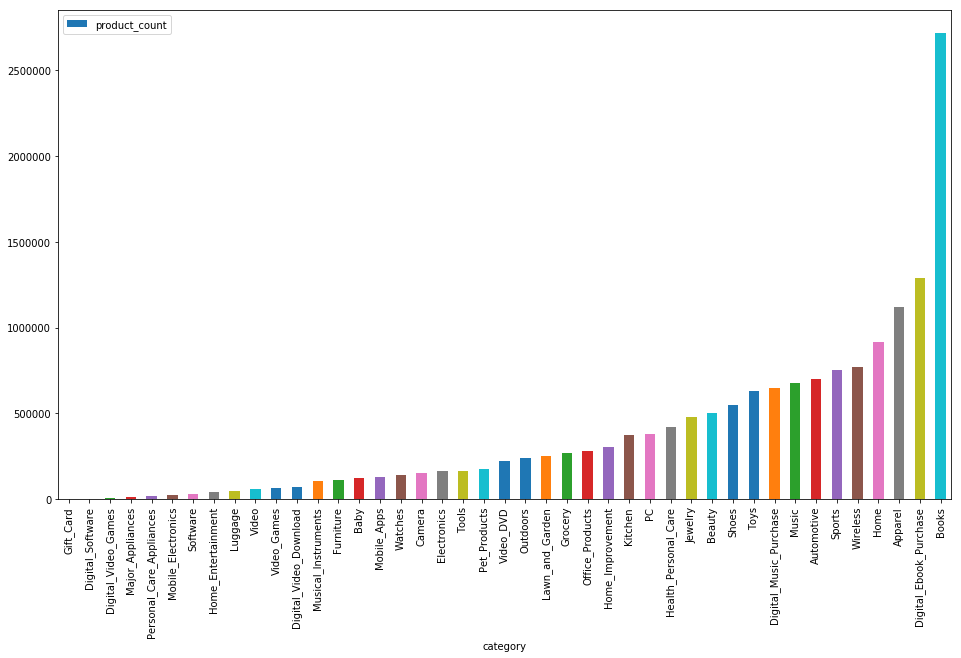

In [10]:
def product_count(category):
    """
    Count unique products
    """
    return read_DataFrame(category).product_parent.nunique()

reviews['product_count'] = reviews['category'].apply(product_count)
reviews.sort_values("product_count").plot.bar(x='category', y='product_count', figsize=(16,9))

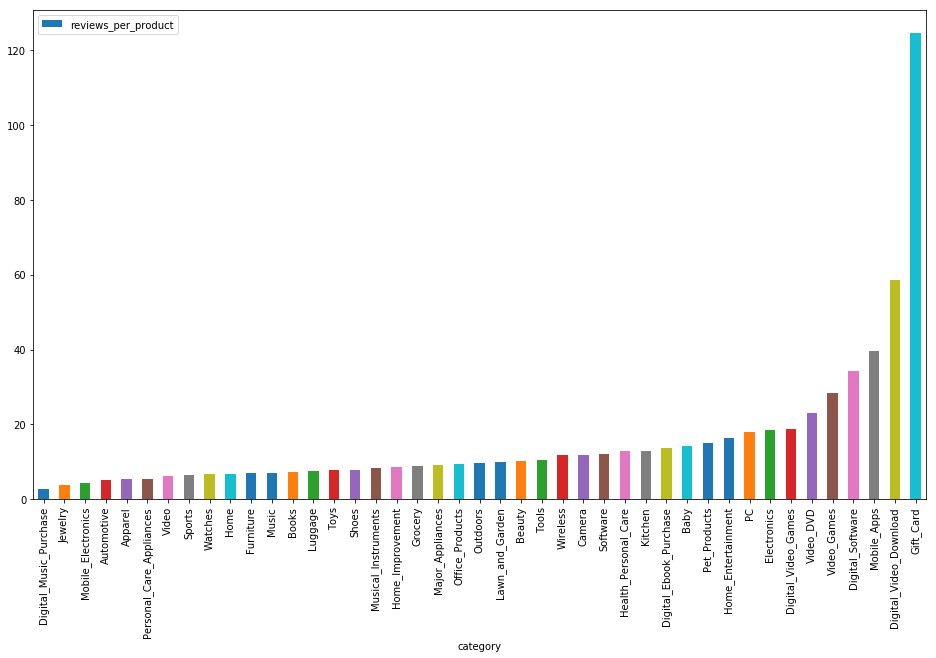

In [39]:
# How many reviews per product in average
reviews['reviews_per_product'] = reviews['review_count']/reviews['product_count']
reviews.sort_values('reviews_per_product').plot.bar(x='category', y='reviews_per_product', figsize=(16,9))

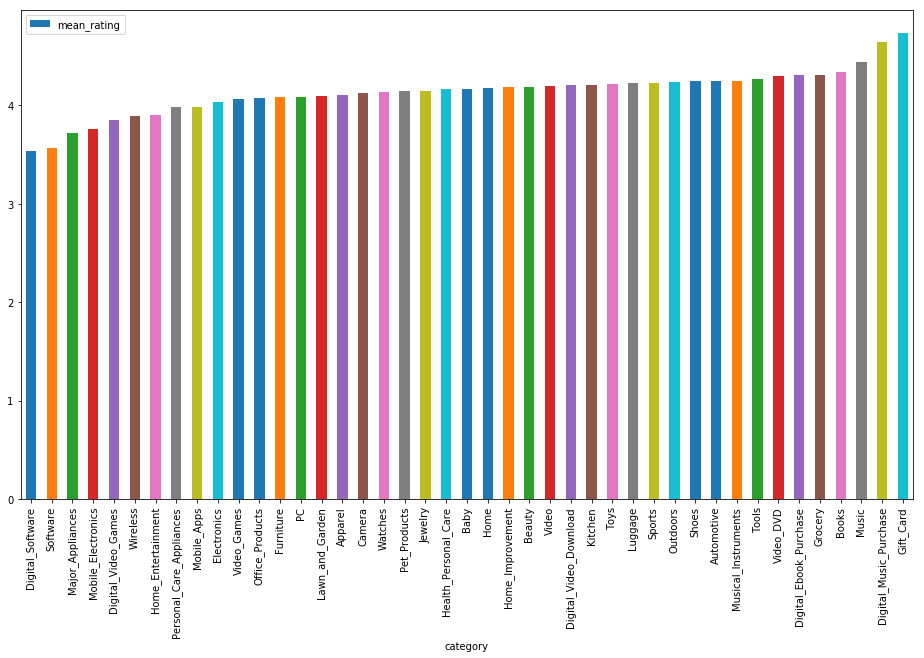

In [40]:
def mean_rating(category):
    """
    Return mean star rating of a category
    """
    return read_DataFrame(category).star_rating.mean()

reviews['mean_rating'] = reviews['category'].apply(mean_rating)
reviews.sort_values('mean_rating').plot.bar(x='category', y='mean_rating', figsize=(16,9))

At first sight, we can see that softwares are more subjected to contreverse regarding the ratings whereas music and books receive in general better grades.
Indeed, categories such as books may be biased in terms of reviews as the buyer is already interested in buying a book which is supposed to interest him. On the contrary, people buyin software or electronic devices may be more disappointed, hence handing out lower ratings.

*Hm, I am not convinced by this explanation. There are not many reviews and products in Software categories, maybe the stats are not reliable? - PJ*


This hypothese can help us in chosing a category to investigate review's reliability.

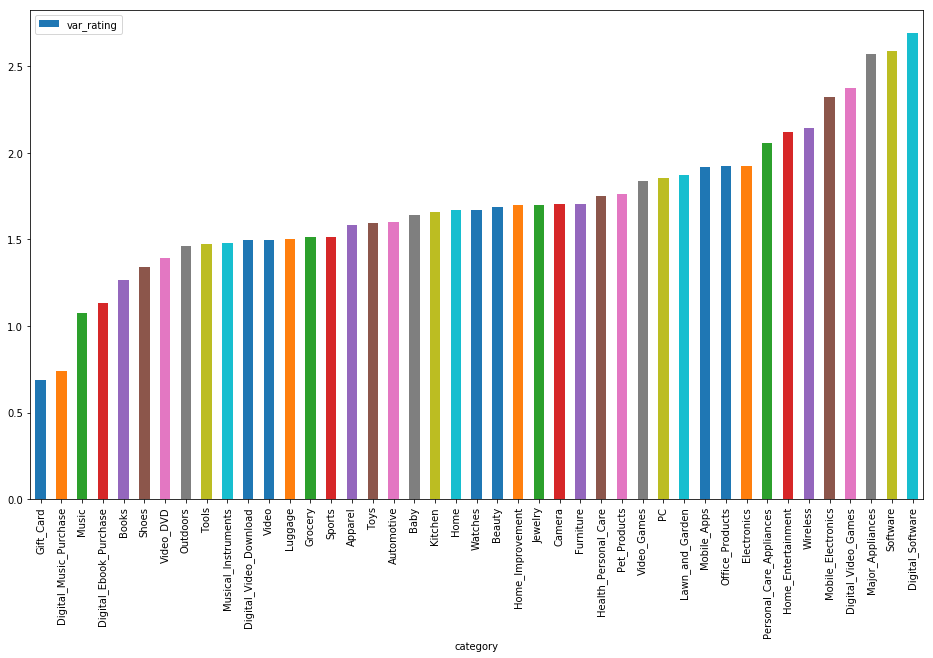

In [41]:
#Variance of rating within category

def var_rating(category):
    """
    Return variance of raiting within category
    """
    return read_DataFrame(category).star_rating.var()

reviews['var_rating'] = reviews['category'].apply(var_rating)
reviews.sort_values('var_rating').plot.bar(x='category', y='var_rating', figsize=(16,9))

C:\Users\Gianni\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


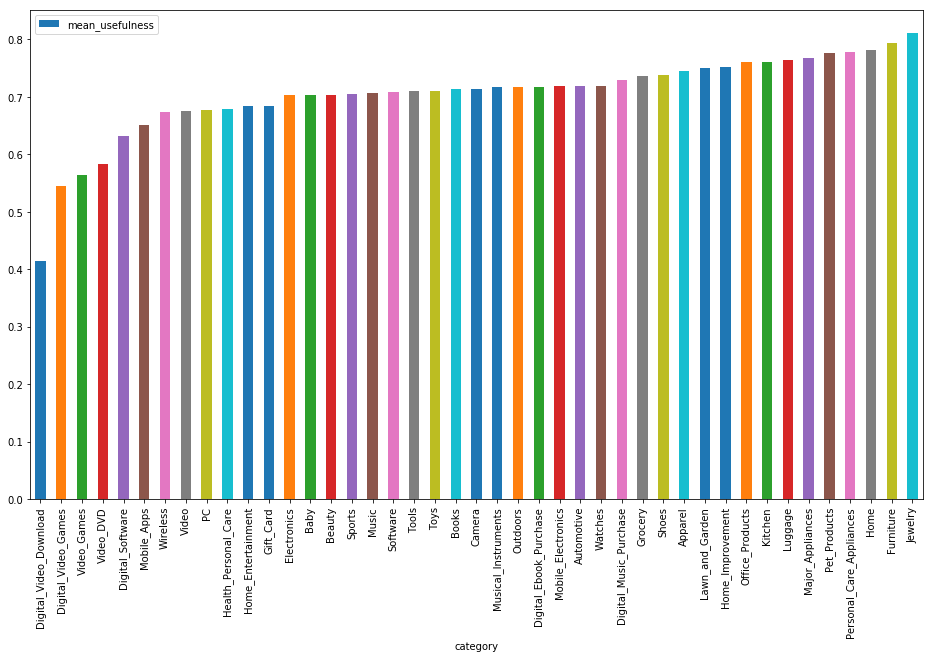

In [17]:
# Mean usefulness score of a category
def mean_usefulness(category):
    """
    Return mean helpful rate of a category
    """
    df = read_DataFrame(category)
    return np.mean(df.helpful_votes / df.total_votes)

reviews['mean_usefulness'] = reviews['category'].apply(mean_usefulness)
reviews.sort_values('mean_usefulness').plot.bar(x='category', y='mean_usefulness', figsize=(16,9))

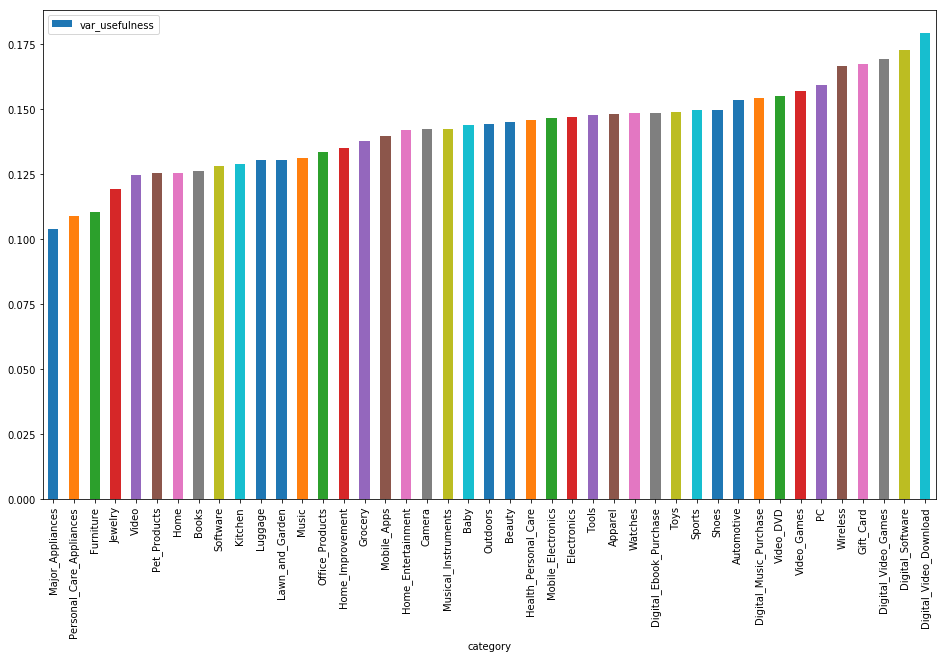

In [18]:
def var_usefulness(category):
    """
    Variance of helpful rate of a category
    """
    df = read_DataFrame(category)
    return np.var(df.helpful_votes / df.total_votes)

reviews['var_usefulness'] = reviews['category'].apply(var_usefulness)
reviews.sort_values('var_usefulness').plot.bar(x='category', y='var_usefulness', figsize=(16,9))

In [42]:
reviews.head()

,category,review_count,product_count,reviews_per_product,mean_rating,var_rating
0,Shoes,4366761,551635,7.916033,4.241256,1.339806
1,Mobile_Apps,5033305,127061,39.613296,3.981599,1.917181
2,Personal_Care_Appliances,85978,15919,5.400967,3.977401,2.053911
3,Home_Improvement,2634428,303796,8.671701,4.182400,1.696582
4,Digital_Video_Download,4056597,69281,58.552807,4.201211,1.496933


## Temporal analysis

In [147]:
chosen_categories = ['Books', 'Wireless', 'PC', 'Home', 'Toys', 'Mobile_Apps', 'Beauty', 'Major_Appliances', 
                     'Personal_Care_Appliances', 'Furniture', 'Jewelry', 
                    'Video', 'Pet_Products', 'Software', 'Kitchen', 'Luggage', 'Lawn_and_Garden', 'Music', 'Office_Products', 
                     'Home_Improvement', 'Grocery', 'Home_Entertainment', 'Camera', 'Musical_Instruments', 'Baby', 'Outdoors',
                    'Health_Personal_Care', 'Mobile_Electronics', 'Electronics', 'Tools', 'Apparel', 'Watches',
                    'Digital_Ebook_Purchase', 'Sports', 'Shoes', 'Automotive', 'Digital_Music_Purchase',
                    'Video_DVD', 'Video_Games', 'Gift_Card', 'Digital_Video_Games', 'Digital_Software',
                    'Digital_Video_Download']

In [6]:
def temporal_analysis(chosen_categories, method):
    df = pd.DataFrame()
    for category in chosen_categories:
        method(category, df)
    return df

In [7]:
def plot_temporal_evolution(chosen_categories, df):
    df.plot(y=chosen_categories, figsize=(16,10))

### Number of reviews by year

In [8]:
def count_reviews_by_year(category, df):
    df_read = read_DataFrame(category)
    df[category] = df_read.groupby(pd.DatetimeIndex(df_read['review_date']).year).size()

In [151]:
reviews['category'].values

array(['Shoes', 'Mobile_Apps', 'Personal_Care_Appliances',
       'Home_Improvement', 'Digital_Video_Download', 'Kitchen',
       'Electronics', 'Digital_Music_Purchase', 'Video',
       'Musical_Instruments', 'Gift_Card', 'Digital_Software', 'Sports',
       'Pet_Products', 'Music', 'Health_Personal_Care', 'PC', 'Home',
       'Home_Entertainment', 'Toys', 'Baby', 'Video_Games',
       'Digital_Video_Games', 'Beauty', 'Apparel', 'Wireless',
       'Automotive', 'Lawn_and_Garden', 'Luggage', 'Video_DVD', 'Watches',
       'Outdoors', 'Office_Products', 'Tools', 'Furniture', 'Jewelry',
       'Camera', 'Software', 'Major_Appliances', 'Grocery',
       'Mobile_Electronics', 'Books', 'Digital_Ebook_Purchase'],
      dtype=object)

In [152]:
df_years = temporal_analysis(chosen_categories, count_reviews_by_year)
#df_years = temporal_analysis(reviews['category'].values, count_reviews_by_year) #using all categories
df_years

,Books,Wireless,PC,Home,Toys,Mobile_Apps,Beauty,Major_Appliances,Personal_Care_Appliances,Furniture,...,Sports,Shoes,Automotive,Digital_Music_Purchase,Video_DVD,Video_Games,Gift_Card,Digital_Video_Games,Digital_Software,Digital_Video_Download
review_date,,,,,,,,,,,,,,,,,,,,,
1995,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,4670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
1997,36610,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,8.0,12.0,NaN,NaN,NaN,NaN
1998,120851,2.0,NaN,5.0,40.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1252.0,13.0,NaN,NaN,NaN,NaN
1999,244559,102.0,384.0,7.0,1974.0,NaN,NaN,NaN,NaN,NaN,...,56.0,3.0,5.0,NaN,15408.0,4923.0,NaN,NaN,NaN,NaN
2000,540476,581.0,3596.0,165.0,3278.0,NaN,33.0,2.0,27.0,11.0,...,149.0,2.0,31.0,3.0,46292.0,23462.0,NaN,NaN,NaN,1.0
2001,444904,1633.0,6588.0,738.0,6184.0,NaN,257.0,NaN,197.0,38.0,...,164.0,1.0,48.0,2.0,66118.0,35608.0,NaN,NaN,NaN,1.0
2002,426895,1413.0,10125.0,2075.0,12676.0,NaN,567.0,21.0,272.0,69.0,...,210.0,361.0,54.0,3.0,92987.0,43810.0,NaN,NaN,NaN,5.0
2003,440007,2562.0,13630.0,5800.0,19165.0,NaN,1252.0,53.0,423.0,640.0,...,781.0,760.0,100.0,5.0,115329.0,40158.0,NaN,NaN,NaN,4.0


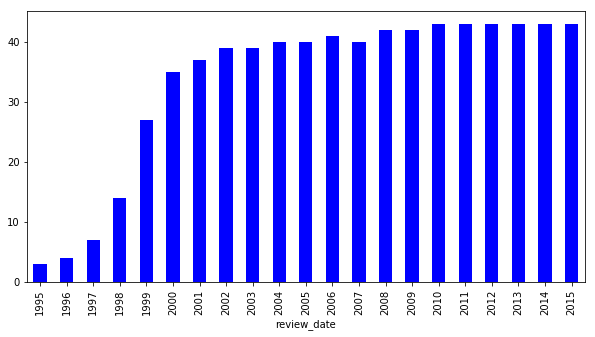

In [159]:
#Count the number of categories per year = non NaN values
df_years.fillna(0).astype(bool).sum(axis=1).plot(kind='bar', color = 'b', figsize=(10,5))

In [172]:
df_final = df_years.fillna(0).astype(bool).sum(axis = 1)
df = pd.DataFrame(df_final)
df.columns = ['Categories']
df

,Number of categories
review_date,
1995,3
1996,4
1997,7
1998,14
1999,27
2000,35
2001,37
2002,39
2003,39


Text(0, 0.5, 'Number of categories')

<Figure size 432x288 with 0 Axes>

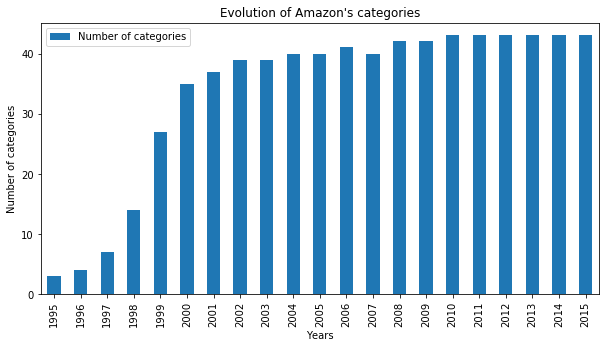

In [177]:
fig0 = plt.figure()
ax = df.plot(kind='bar', title="Number of Amazon's categories over time", figsize = (10,5))

ax.set_xlabel("Years")
ax.set_ylabel("Number of categories")

In [175]:
fig0 = ax.get_figure()
fig0.savefig("output1.png")

Text(0, 0.5, 'Number of Reviews')

<Figure size 432x288 with 0 Axes>

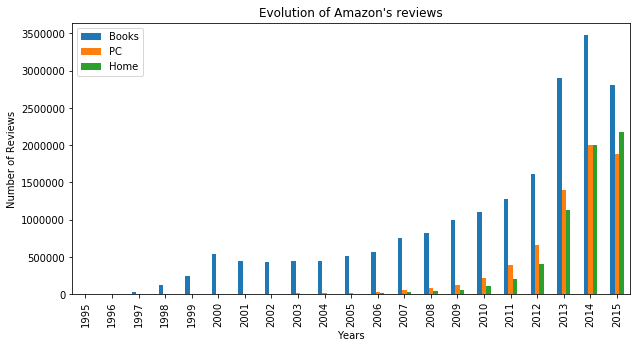

In [13]:
fig = plt.figure()
ax = df_years[['Books', 'PC', 'Home']].plot(kind='bar', title="Evolution of Amazon's reviews", figsize = (10,5))

ax.set_xlabel("Years")
ax.set_ylabel("Number of Categories")

In [17]:
fig = ax.get_figure()
fig.savefig("output.png")

###### Figure for the report

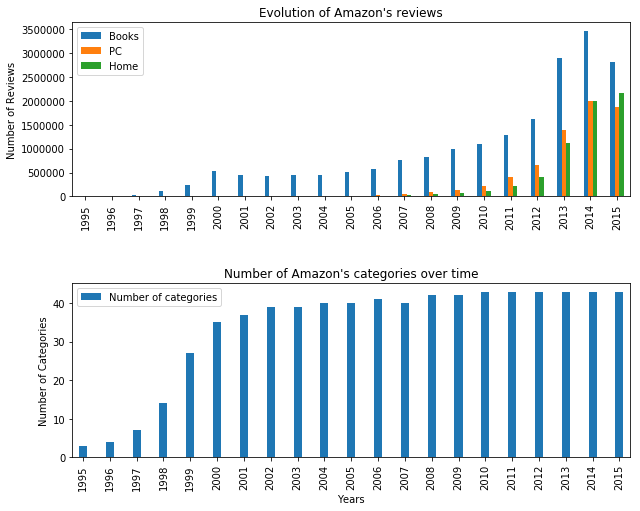

In [200]:
fig_sub = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig_sub.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig_sub.add_subplot(212)

df_years[['Books', 'PC', 'Home']].plot(kind='bar', ax=ax1, title="Evolution of Amazon's reviews", figsize = (10,8))
df.plot(kind='bar', ax=ax2, title="Number of Amazon's categories over time", figsize = (10,8), width=0.3)

ax1.set_xlabel("")
ax1.set_ylabel("Number of Reviews")

ax2.set_xlabel("Years")
ax2.set_ylabel("Number of Categories")

fig_sub.subplots_adjust(hspace=0.5)

In [202]:
#Save figure
fig_sub.savefig("sub1.png")

In [209]:
#Compute the number of reviews per product
reviews.head()

,category,review_count,product_count,reviews_per_product,mean_rating,var_rating
0,Shoes,4366761,551635,7.916033,4.241256,1.339806
1,Mobile_Apps,5033305,127061,39.613296,3.981599,1.917181
2,Personal_Care_Appliances,85978,15919,5.400967,3.977401,2.053911
3,Home_Improvement,2634428,303796,8.671701,4.182400,1.696582
4,Digital_Video_Download,4056597,69281,58.552807,4.201211,1.496933


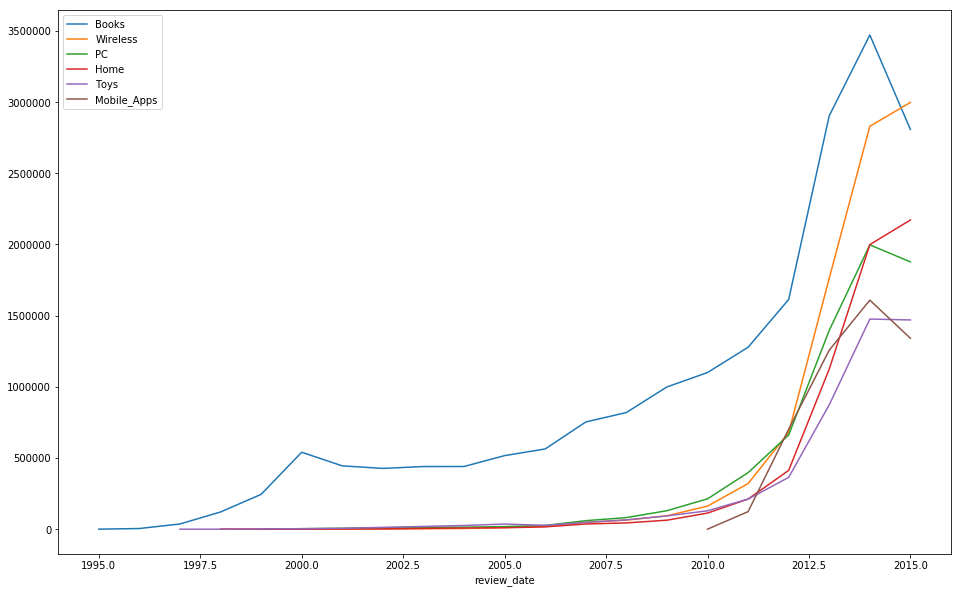

In [27]:
plot_temporal_evolution(chosen_categories, df_years)

### Number of products reviewed by year

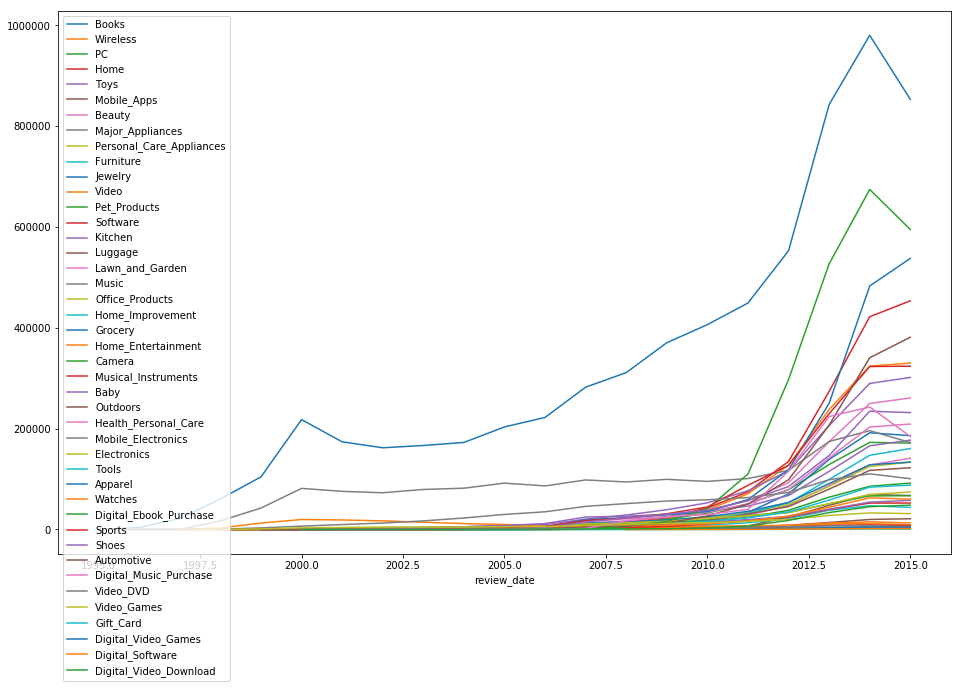

In [176]:
def count_products_by_year(category, df):
    df_read = read_DataFrame(category)
    df[category] = df_read.groupby(pd.DatetimeIndex(df_read['review_date']).year).product_parent.nunique()
    
products_years = temporal_analysis(chosen_categories, count_products_by_year)
plot_temporal_evolution(chosen_categories, products_years)

### Average rating per year

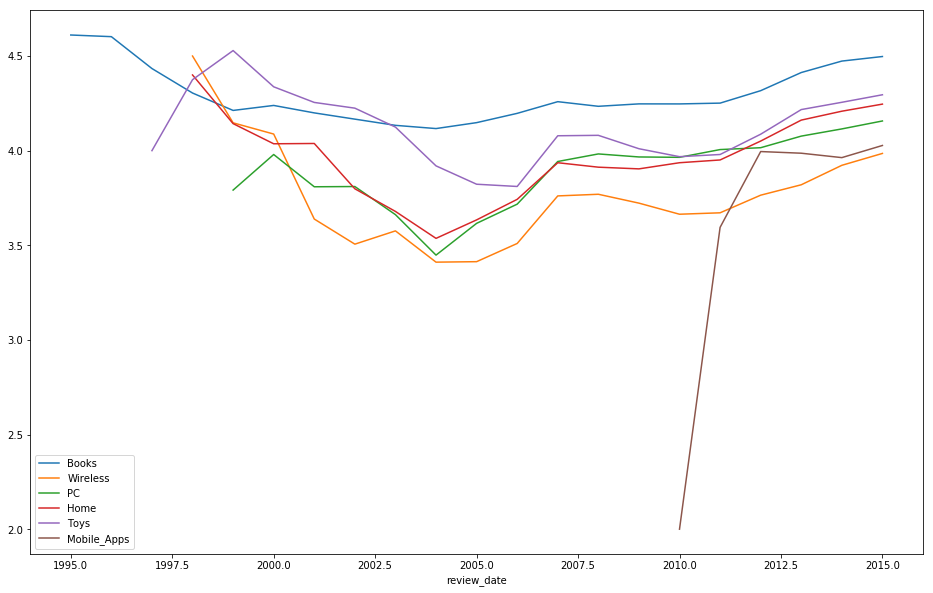

In [29]:
def rating_by_year(category, df):
    df_read = read_DataFrame(category)
    df[category] = df_read.groupby(pd.DatetimeIndex(df_read['review_date']).year).star_rating.mean()
    
rating_years = temporal_analysis(chosen_categories, rating_by_year)
plot_temporal_evolution(chosen_categories, rating_years)

### Usefullness by year

In [30]:
def usefulness_by_year(category, df):
    df_read = read_DataFrame(category)
    df_read['usefulness'] = df_read.helpful_votes / df_read.total_votes
    df[category] = df_read.groupby(pd.DatetimeIndex(df_read['review_date']).year).usefulness.mean()
    
usefulness_years = temporal_analysis(chosen_categories, usefulness_by_year)


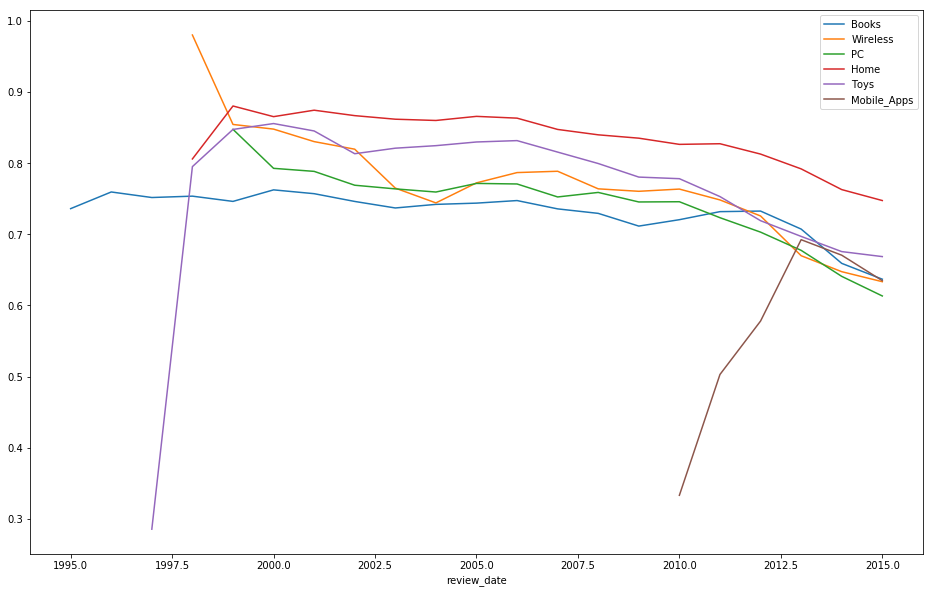

In [31]:
plot_temporal_evolution(chosen_categories, usefulness_years)

Are there more reviews but of lower quality?

## Analysis of books reviews

### Are helpful reviews related to star ratings?

In [9]:
df_books = read_DataFrame('Books')
df_books["helpful_rate"] = df_books["helpful_votes"] / df_books["total_votes"]
df_books.head()

,customer_id,review_id,product_parent,product_category,star_rating,helpful_votes,total_votes,review_date,helpful_rate
0,25933450,RJOVP071AVAJO,84656342,Books,5,0,0,2015-08-31,NaN
1,1801372,R1ORGBETCDW3AI,729938122,Books,5,0,0,2015-08-31,NaN
2,5782091,R7TNRFQAOUTX5,678139048,Books,5,0,0,2015-08-31,NaN
3,32715830,R2GANXKDIFZ6OI,712432151,Books,5,0,0,2015-08-31,NaN
4,14005703,R2NYB6C3R8LVN6,800572372,Books,5,2,2,2015-08-31,1.0


In [218]:
# keep only review with books_reviews with more than 5 votes
df_books_5 = df_books[df_books["total_votes"] > 5]
df_books_5.count()

customer_id         3992312
review_id           3992312
product_parent      3992312
product_category    3992312
star_rating         3992312
helpful_votes       3992312
total_votes         3992312
review_date         3992312
helpful_rate        3992312
dtype: int64

In [34]:
# groupby customer_id and filter to keep only customer with more than 5 reviews
df_books_5_5 = df_books_5.groupby("customer_id").filter(lambda r: len(r) > 5)

df_books_5_5.head()

,customer_id,review_id,product_parent,product_category,star_rating,helpful_votes,total_votes,review_date,helpful_rate
348,47904504,R2T328JHHK1NT0,3731425,Books,5,5,7,2015-08-31,0.714286
396,13129675,RH3DZDJG7350O,888190146,Books,4,12,13,2015-08-31,0.923077
438,52254797,RU9QBKQKRKNLK,953844844,Books,5,7,8,2015-08-31,0.875000
482,33356949,R32XJ7SV9MYTZN,906441903,Books,4,16,17,2015-08-31,0.941176
600,52413873,R25LRAO8Z4UGZO,592531765,Books,5,9,9,2015-08-31,1.000000


Correlation between helpful review and star rating:  0.5704854834055942


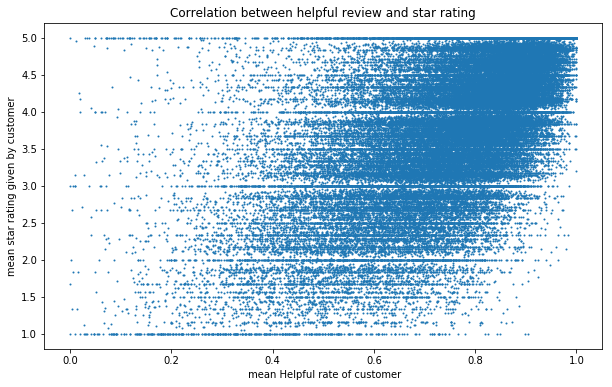

In [36]:
# mhr = mean helpful rate
mhr_by_customer = df_books_5_5.groupby("customer_id")["helpful_rate"].aggregate(np.mean)

# msr = mean star rating
msr_by_customer = df_books_5_5.groupby("customer_id")["star_rating"].aggregate(np.mean)

plt.figure(figsize=(10, 6))
plt.scatter(mhr_by_customer, msr_by_customer, s=1)
plt.xlabel(" mean Helpful rate of customer")
plt.ylabel("mean star rating given by customer")
plt.title("Correlation between helpful review and star rating")
print("Correlation between helpful review and star rating: ",np.corrcoef(mhr_by_customer, msr_by_customer)[0][1])

So, people are more likely to find a review helpful if the star rating corresponding is high. This could indicate a sort of bias or snowball effect.

### Does high rating influence the usefulness score of review?

Idea: do an observation study. For customers with at least 5 reviews and products with at least 5 reviews. We suppose that a customer writes reviews of comparable quality, regardless of score which he gives. (We could even do better and consider reviews that have a sufficient length.) Then, for each customer we count how many pairs of reviews fall in the categories: 1. reviews have equal star ratings and equal helpful rate, 2. reviews have different star rates and equal helpful rate, 3. review A has better star rating and better helpful rate, 4. review A has better star rate but worse helpful rate. We aggregate these over all reviewers and interprete the results. If category 3 is significantly greater than 4 we can say that the star rating influence positively how helpful the review seems to us (which is bad).

## Analysis of text reviews

Consider downloading a K-core subset of a desired category from here: [Source](http://jmcauley.ucsd.edu/data/amazon/)

I also extracted data manually but these are too big files to upload to my gdrive. You can ask me for a specific subset


## Statistical analysis of very bad reviews

In [10]:
df_books_ref = df_books[(df_books['total_votes'] > 9)]

Let's choose reviews that have at least 5 votes an 0.0 helpful rate.

In [11]:
bad_df_books = df_books[(df_books['helpful_rate'] == 0.0) & (df_books['total_votes'] > 9)]
bad_df_books.count()

customer_id         31346
review_id           31346
product_parent      31346
product_category    31346
star_rating         31346
helpful_votes       31346
total_votes         31346
review_date         31346
helpful_rate        31346
dtype: int64

Let's compare the basic statistics of "bad reviews" and all the reviews in books category.

In [18]:
bad_df_books['star_rating'].describe()

count    31346.000000
mean         2.624896
std          1.593230
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          5.000000
Name: star_rating, dtype: float64

In [27]:
#bad_df_books['star_rating'].hist()

In [20]:
df_star = bad_df_books['star_rating']
c = Counter(df_star)

df_star_prop = pd.DataFrame(c, index=[0]).transpose().sort_index(axis=0)
df_star_prop.columns = ["Books category"]
df_star_prop

,Books category
1,12205
2,4220
3,5081
4,2808
5,7032


Text(0, 0.5, 'Number of Articles')

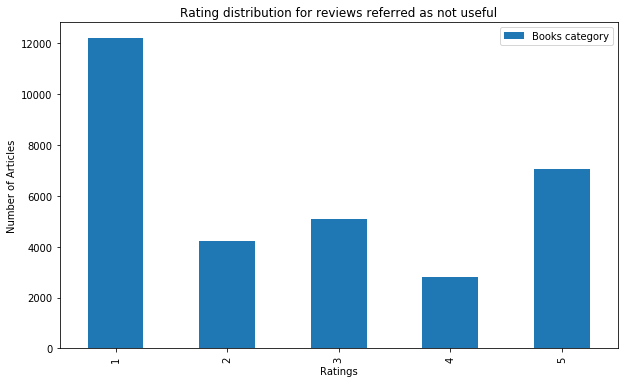

In [21]:
ax=df_star_prop.plot(kind='bar', figsize=(10,6), title="Rating distribution for reviews referred as not useful")

ax.set_xlabel("Ratings")
ax.set_ylabel("Number of Articles")

In [38]:
df_books_ref['star_rating'].describe()

count    2.452436e+06
mean     3.631613e+00
std      1.597111e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: star_rating, dtype: float64

In [28]:
#df_books_ref['star_rating'].hist()

In [22]:
df_star_ref = df_books_ref['star_rating']
c_ref = Counter(df_star_ref)

df_star_proportion = pd.DataFrame(c_ref, index=[0]).transpose().sort_index(axis=0)
df_star_proportion.columns = ["Books category"]
df_star_proportion

,Books category
1,470265
2,229847
3,234790
4,315701
5,1201833


Text(0, 0.5, 'Number of Articles')

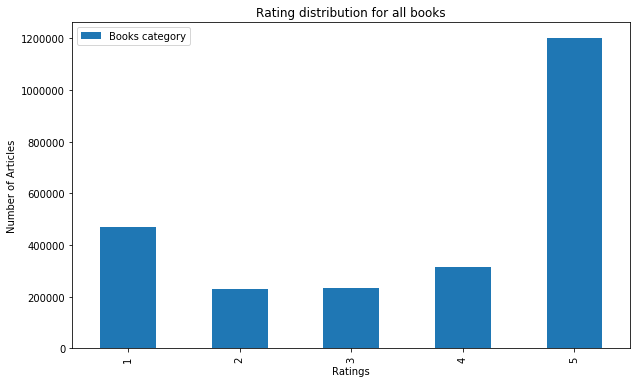

In [23]:
ax_ref=df_star_proportion.plot(kind='bar', figsize=(10,6), title="Rating distribution for all books")

ax_ref.set_xlabel("Ratings")
ax_ref.set_ylabel("Number of Articles")

There are a lot of negative ratings in bad reviews. Other scores also appear, though. Considering all the reviews, the 5 star ratings are most common.

###### Figure for the report

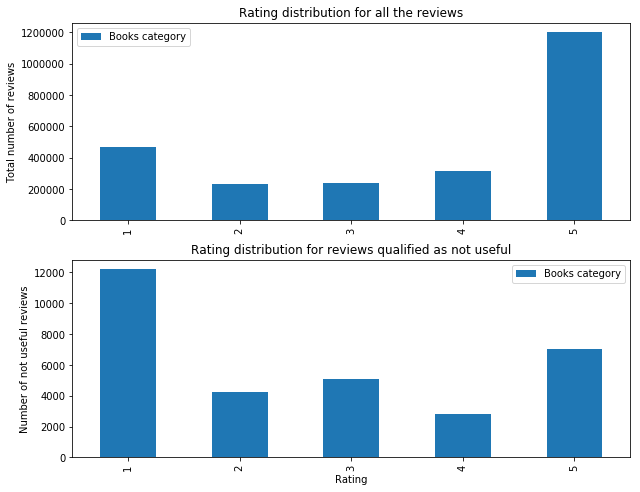

In [24]:
#Figure
fig_star_comparison = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig_star_comparison.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig_star_comparison.add_subplot(212)

df_star_proportion.plot(kind='bar', ax=ax1, title="Rating distribution for all the reviews", figsize = (10,8))
df_star_prop.plot(kind='bar', ax=ax2, title="Rating distribution for reviews qualified as not useful", figsize = (10,8))

ax1.set_xlabel("")
ax1.set_ylabel("Total number of reviews")

ax2.set_xlabel("Rating")
ax2.set_ylabel("Number of not useful reviews")

fig_star_comparison.subplots_adjust(hspace=0.20)

In [25]:
#Save figure
fig_star_comparison.savefig("star_comparison.png")

In [43]:
#Number of reviews per customer
bad_df_books['customer_id'].count()/ bad_df_books['customer_id'].nunique()

1.0893130739428716

In [44]:
#Number of reviews per customer
df_books_ref['customer_id'].count()/ df_books_ref['customer_id'].nunique()

1.9522821056013493

On average, only one bad review is written per customer, while two "regular" reviews per customer.

In [45]:
bad_df_books.groupby('customer_id').size().describe()

count    102471.000000
mean          1.089313
std           0.888277
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         140.000000
dtype: float64

In [46]:
df_books_ref.groupby('customer_id').size().describe()

count    2.390424e+06
mean     1.952282e+00
std      1.774935e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.004800e+04
dtype: float64

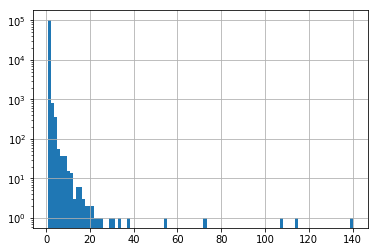

In [47]:
fig, ax = plt.subplots()
bad_df_books.groupby('customer_id').size().hist(ax=ax, bins=100)
ax.set_yscale('log')


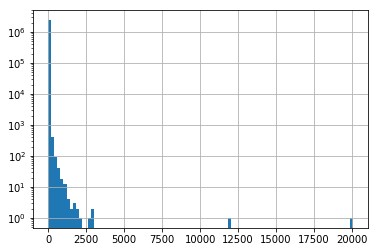

In [48]:
fig, ax = plt.subplots()
df_books_ref.groupby('customer_id').size().hist(ax=ax, bins=100)
ax.set_yscale('log')

There are only a few customers that produce a lot of really bad reviews. The outliers can represent "fake reviews" and "fake reviewers". In the plot of reference book reviews there are also strong outliers. It seems unlikely that a person can write 20000 genuine reviews. Let's check if this is the "bad guy".

In [59]:
bad_guys = bad_df_books.groupby('customer_id').filter(lambda x: len(x)> 100)['customer_id'].unique()
bad_guys

array([35985708, 50122160, 43530996])

In [61]:
df_books_ref.groupby('customer_id').filter(lambda x: len(x)> 2500)['customer_id'].unique()

array([50732546, 36642996, 50776149, 52615377, 50122160])

So we caught one bad guy! 50122160

# Text-based model

## A. Deviation from average rating

Based on the previous analysis, it is highly probable that the 'bad guy' will give a rating that is 'far' from the mean of the ratings for a given product. The goal here is make our analysis more robust and to ensure the the review is actually bad.

Let's focus our attention to the customer id 50122160.

In [69]:
#First define the DataFrame we'll use (the bad reviewer seems to be interested in books)
df_books = read_DataFrame('Books')
df_books.head() #read_DataFrame('Books').head()

,customer_id,review_id,product_parent,product_category,star_rating,helpful_votes,total_votes,review_date
0,25933450,RJOVP071AVAJO,84656342,Books,5,0,0,2015-08-31
1,1801372,R1ORGBETCDW3AI,729938122,Books,5,0,0,2015-08-31
2,5782091,R7TNRFQAOUTX5,678139048,Books,5,0,0,2015-08-31
3,32715830,R2GANXKDIFZ6OI,712432151,Books,5,0,0,2015-08-31
4,14005703,R2NYB6C3R8LVN6,800572372,Books,5,2,2,2015-08-31


In [74]:
df_bad_reviewer = df_books[df_books['customer_id'] == 50122160]
df_bad_reviewer.head()

,customer_id,review_id,product_parent,product_category,star_rating,helpful_votes,total_votes,review_date
10316892,50122160,R2D4XQKH128F3O,227996624,Books,5,4,5,2005-10-14
10316896,50122160,R3CTHOBUQHSIUV,622825265,Books,5,3,3,2005-10-14
10316978,50122160,R327XTBZOEFFFH,804522572,Books,5,3,3,2005-10-14
10316991,50122160,R36ACJURUNHD38,223490277,Books,5,0,0,2005-10-14
10317022,50122160,R3QP8VTFWA343T,331063473,Books,5,0,1,2005-10-14


In [95]:
df_bad_reviewer[df_bad_reviewer['star_rating'] == 5].count().unique() / df_bad_reviewer['star_rating'].count()

array([0.99934652])

The reviewer rates almost every review with 5 stars. Let's focus our attention on the average rating of a certain product and compare if the rating given by this reviewer is coherent (indeed it is possible that all the good reviews given are in concordance with others i.e. the product is good).
This will ensure that the review are satisfactory or not.

Hypothesis: use articles that receive at least 10 ratings to allow unbiased comparison.

In [113]:
#df_product = df_books[df_books['product_parent'].count() > 9 & df_books['']]
df_article = df_books[df_books['product_parent'] == 227996624]
df_article.head(n=10)
#print(df_books[df_books['product_parent']].count()

,customer_id,review_id,product_parent,product_category,star_rating,helpful_votes,total_votes,review_date
5276641,20776468,RBN2CWWJ4Z0Y,227996624,Books,5,0,0,2014-04-28
10316892,50122160,R2D4XQKH128F3O,227996624,Books,5,4,5,2005-10-14
10317258,50122160,R2SO7GWIH233FS,227996624,Books,5,0,1,2005-10-14
10324598,53054022,R21KW3IMWTJWLR,227996624,Books,5,7,7,2005-10-10
15918114,37878149,R2N23AO7USA6U6,227996624,Books,5,3,3,2010-04-29
18369889,15078777,R2M6XZQTTEM4HN,227996624,Books,5,4,6,2007-08-20
19527387,50122160,R260152UVJRFE6,227996624,Books,5,1,2,2005-10-14


## B. Review's length

We'll now focus on the text content of the reviews.

The texts are stored in a parquet format. We focus on 3 categories to perform text mining:

- Automotive
- PC
- Wireless

In [5]:
TEXT_PARQUET_DIR = './text_parquet/'

In [6]:
#Text parquet link to the desired category (using complete path)
df_wireless = pd.read_parquet(TEXT_PARQUET_DIR+'Wireless_text.parquet.gzip/'+'part-00000-321618fb-c8f4-49c2-a9bb-a4afbf170e56-c000.gz.parquet', 
                engine='fastparquet')

In [6]:
df_wireless.head()

,review_id,review_headline,review_body
0,R3W4P9UBGNGH1U,"Looks good, functions meh",2 issues - Once I turned on the circle apps ...
1,R15V54KBMTQWAY,A fun little gadget,"I’m embarrassed to admit that until recently, ..."
2,RY8I449HNXSVF,Five Stars,Fits iPhone 6 well
3,R18TLJYCKJFLSR,Great charger,Great charger. I easily get 3+ charges on a S...
4,R1NK26SWS53B8Q,Five Stars,Great for the price :-)


# Sentiment Analysis

To perform sentiment analysis we'll use __nltk__ library.

Note: we'll work on PC's category.

In [7]:
import nltk.data

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')

C:\Users\Gianni\Anaconda3\envs\ada\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Gianni\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Load the data of the PC category:

In [ ]:
#df_pc = pd.read_parquet(TEXT_PARQUET_DIR+'PC_text.parquet.gzip/'+'part-00000-9ba038bf-8d13-47b6-879d-9b380b00a182-c000.gz.parquet', 
#               engine='fastparquet')
#df_pc.head()

__TEST__

In [8]:
example = 'I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight.'


In [9]:
#Initialize the analyzer
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(example)

In [10]:
print(example, '\n')
print('Negative sentiment:',vs['neg'])
print('Neutral sentiment:',vs['neu'])
print('Positive sentiment:',vs['pos'])
print('Compound sentiment:',vs['compound'])

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

Negative sentiment: 0.039
Neutral sentiment: 0.784
Positive sentiment: 0.176
Compound sentiment: 0.7096


In [11]:
vs['compound']

0.7096

__END TEST__

So basically, the compound score is the aggregate score (we'll use this one).

In [8]:
#Analyzer initialisation
analyzer = SentimentIntensityAnalyzer()

In [9]:
#Compute the compound score for each review
def aggregate_score(txt):
    """
    Compute the compound score
    """
    agg_score = analyzer.polarity_scores(txt)
    return agg_score['compound']

Apply it to the reviews:

In [49]:
aggregate_score(example)

0.7096

In [50]:
#df_wireless['compound_score'] = df_wireless['review_body'].apply(aggregate_score)

In [51]:
df_wireless.head()

,review_id,review_headline,review_body,compound_score
0,R3W4P9UBGNGH1U,"Looks good, functions meh",2 issues - Once I turned on the circle apps ...,0.4215
1,R15V54KBMTQWAY,A fun little gadget,"I’m embarrassed to admit that until recently, ...",0.9741
2,RY8I449HNXSVF,Five Stars,Fits iPhone 6 well,0.2732
3,R18TLJYCKJFLSR,Great charger,Great charger. I easily get 3+ charges on a S...,0.8625
4,R1NK26SWS53B8Q,Five Stars,Great for the price :-),0.7506


Note: this code runs in 2hours

Sentiment __distribution__ across all reviews of the wireless category.

Text(0.5, 0, 'Sentiment compound score')

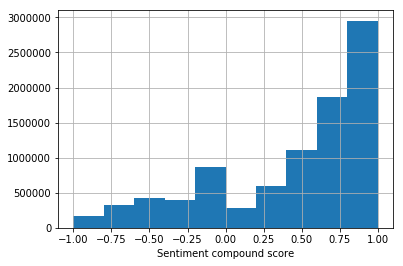

In [54]:
df_wireless['compound_score'].hist()
plt.xlabel('Sentiment compound score')
plt.ylabel('')

<Figure size 720x432 with 0 Axes>

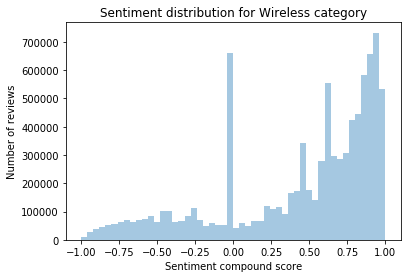

<Figure size 720x432 with 0 Axes>

In [60]:
import seaborn as sns

sentiment1 = plt.figure()
ax = sns.distplot(df_wireless['compound_score'], kde=False)
ax.set(xlabel='Sentiment compound score', ylabel='Number of reviews', title='Sentiment distribution for Wireless category')
plt.figure(figsize=(10,6))

In [62]:
#Save figure
sentiment1.savefig("sentiment1.png")

Now use a subset of wireless category where it is highly probable to find fake reviews > deviation from average > 2 for ex.
Finally look for difference in distribution.

In [10]:
#I'll work on a smaller dataframe by taking a sampling of the orifinal 
df_wireless_sampled = df_wireless.iloc[::100, :]
df_wireless_sampled.head()

,review_id,review_headline,review_body
0,R3W4P9UBGNGH1U,"Looks good, functions meh",2 issues - Once I turned on the circle apps ...
100,R3HYIG2YKZZVMA,Poor quality control,I ordered two of these about 1.5 months ago. T...
200,R3ANVKDKC9XRGA,Three Stars,Cute but cheap.
300,R1GABMPRSQH32H,Four Stars,Great product fast shipping
400,R1FUJCVCTSBBIF,Two Stars,charges very slow


In [11]:
df_wireless_sampled['compound_score'] = df_wireless_sampled['review_body'].apply(aggregate_score)

C:\Users\Gianni\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_wireless_sampled.head()

,review_id,review_headline,review_body,compound_score
0,R3W4P9UBGNGH1U,"Looks good, functions meh",2 issues - Once I turned on the circle apps ...,0.4215
100,R3HYIG2YKZZVMA,Poor quality control,I ordered two of these about 1.5 months ago. T...,0.3165
200,R3ANVKDKC9XRGA,Three Stars,Cute but cheap.,0.2500
300,R1GABMPRSQH32H,Four Stars,Great product fast shipping,0.6249
400,R1FUJCVCTSBBIF,Two Stars,charges very slow,-0.2732


Check if it's comparable to the entire data

Text(0, 0.5, '')

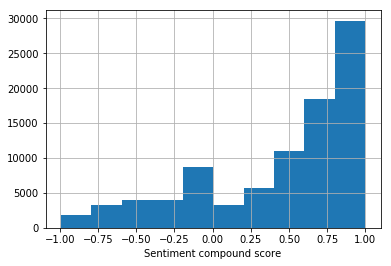

In [17]:
df_wireless_sampled['compound_score'].hist()
plt.xlabel('Sentiment compound score')
plt.ylabel('')

###### Figure for report

Text(0, 0.5, 'Number of reviews')

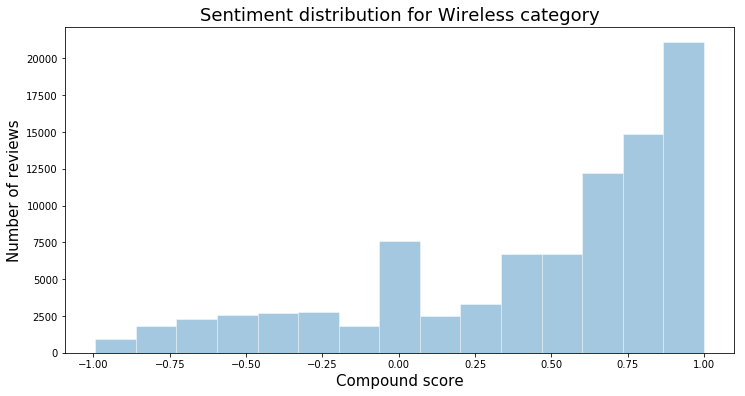

In [65]:
#Plot with seaborn
sentiment3 = plt.figure(figsize=(12,6))
ax = sns.distplot(df_wireless_sampled['compound_score'], kde = False, bins=15, hist_kws=dict(edgecolor="w", linewidth=1))
#ax.set(xlabel='Compound score', ylabel='Number of reviews', 
#       title='Sentiment distribution for supposed bad reviews in Wireless category')

ax.axes.set_title("Sentiment distribution for Wireless category",fontsize=18)
ax.set_xlabel("Compound score",fontsize=15)
ax.set_ylabel("Number of reviews",fontsize=15)

For the wireless category, compute the df with the total vote, helfulness,...


__review_id__ is the key to map article with the df_wireless dataframe

In [12]:
df_wireless_features = read_DataFrame('Wireless')
df_wireless_features["helpful_rate"] = df_wireless_features["helpful_votes"] / df_wireless_features["total_votes"]
df_wireless_features.head()

,customer_id,review_id,product_parent,product_category,star_rating,helpful_votes,total_votes,review_date,helpful_rate
0,16414143,R3W4P9UBGNGH1U,852431543,Wireless,2,1,3,2015-08-31,0.333333
1,50800750,R15V54KBMTQWAY,516894650,Wireless,4,0,0,2015-08-31,NaN
2,15184378,RY8I449HNXSVF,984297154,Wireless,5,0,0,2015-08-31,NaN
3,10203548,R18TLJYCKJFLSR,279912704,Wireless,5,0,0,2015-08-31,NaN
4,488280,R1NK26SWS53B8Q,662791300,Wireless,5,0,0,2015-08-31,NaN


Filtering: keep the ones with more than 5 votes

In [13]:
# keep only review with books_reviews with more than 5 votes
#df_wireless_features_5 = df_wireless_features[df_wireless_features["total_votes"] > 5] #& useful == 0

df_wireless_features_5 = df_wireless_features[(df_wireless_features['helpful_rate'] == 0.0) & (df_wireless_features['total_votes'] > 5)]
#df_wireless_features_5.count()


df_wireless_features_5.head()

,customer_id,review_id,product_parent,product_category,star_rating,helpful_votes,total_votes,review_date,helpful_rate
263,26946546,RZ1SLOVQ4Q4N4,914696683,Wireless,3,0,6,2015-08-31,0.0
1805,38512881,R3LDQ40OZRWTGM,799413493,Wireless,1,0,13,2015-08-31,0.0
1994,11938973,RLQZKURAH6FO2,485236499,Wireless,1,0,14,2015-08-31,0.0
2153,25267629,RLWYWNFG52V3T,296675719,Wireless,1,0,10,2015-08-31,0.0
3702,30446268,RANM0K0TGAJ9E,548577406,Wireless,1,0,13,2015-08-31,0.0


In [39]:
#df_test = df_wireless_features_5.groupby("product_parent")
#df_test.head()

In [40]:
def filtering(df):
    
    df = df.filter("total_votes > 5")
    df_plus = df.groupby("customer_id").agg(count(lit(1)).alias("R_tot_reviews"))
    df_joined = df.join(df_plus, "customer_id")
                                        
    return df_joined.filter("R_tot_reviews > 5")

In [41]:
def deviation_avg_rating(df):

    df_avg = df.groupby("product_parent").agg(mean("star_rating").alias("avg_rating"))
    df_joined = df.join(df_avg, "product_parent")
    df_joined_avg = df_joined.withColumn("dev_avg_rating", (df_joined.star_rating - df_joined.avg_rating))
    
    return df_joined_avg.drop("avg_rating")

In [43]:
#df_fused_5 = filtering(df_wireless_features)
#df_fused_5 = deviation_avg_rating(df_fused_5)

In [44]:
#df_wireless_dar = deviation_avg_rating(df_wireless_features_5)
#df_wireless_dar.head()

__OPTION 1__

In [ ]:
#Keep samples with deviation from mean > 2
df_wireless_final = df_wireless_dar[df_wireless_dar['dev_avg_rating'] > 2 or df_wireless_dar['dev_avg_rating'] < -2]
df_wireless_final.head()

__OPTION 2__

In [14]:
df_wireless_final = df_wireless_features_5
df_wireless_final.head()

,customer_id,review_id,product_parent,product_category,star_rating,helpful_votes,total_votes,review_date,helpful_rate
263,26946546,RZ1SLOVQ4Q4N4,914696683,Wireless,3,0,6,2015-08-31,0.0
1805,38512881,R3LDQ40OZRWTGM,799413493,Wireless,1,0,13,2015-08-31,0.0
1994,11938973,RLQZKURAH6FO2,485236499,Wireless,1,0,14,2015-08-31,0.0
2153,25267629,RLWYWNFG52V3T,296675719,Wireless,1,0,10,2015-08-31,0.0
3702,30446268,RANM0K0TGAJ9E,548577406,Wireless,1,0,13,2015-08-31,0.0


In [16]:
df_wireless_final[["review_id"]].head()

,review_id
263,RZ1SLOVQ4Q4N4
1805,R3LDQ40OZRWTGM
1994,RLQZKURAH6FO2
2153,RLWYWNFG52V3T
3702,RANM0K0TGAJ9E


In [18]:
df_wireless_sampled[['review_id']].head()

,review_id
0,R3W4P9UBGNGH1U
100,R3HYIG2YKZZVMA
200,R3ANVKDKC9XRGA
300,R1GABMPRSQH32H
400,R1FUJCVCTSBBIF


In [21]:
df_test1 = df_wireless_final.iloc[0:5]
df_test1.head()

,customer_id,review_id,product_parent,product_category,star_rating,helpful_votes,total_votes,review_date,helpful_rate
263,26946546,RZ1SLOVQ4Q4N4,914696683,Wireless,3,0,6,2015-08-31,0.0
1805,38512881,R3LDQ40OZRWTGM,799413493,Wireless,1,0,13,2015-08-31,0.0
1994,11938973,RLQZKURAH6FO2,485236499,Wireless,1,0,14,2015-08-31,0.0
2153,25267629,RLWYWNFG52V3T,296675719,Wireless,1,0,10,2015-08-31,0.0
3702,30446268,RANM0K0TGAJ9E,548577406,Wireless,1,0,13,2015-08-31,0.0


In [32]:
df_test2 = df_wireless_sampled.iloc[0:5]
df_test2

,review_id,review_headline,review_body,compound_score
0,R3W4P9UBGNGH1U,"Looks good, functions meh",2 issues - Once I turned on the circle apps ...,0.4215
100,R3HYIG2YKZZVMA,Poor quality control,I ordered two of these about 1.5 months ago. T...,0.3165
200,R3ANVKDKC9XRGA,Three Stars,Cute but cheap.,0.2500
300,R1GABMPRSQH32H,Four Stars,Great product fast shipping,0.6249
400,R1FUJCVCTSBBIF,Two Stars,charges very slow,-0.2732


In [33]:
df_test2.reset_index(drop=True)

,review_id,review_headline,review_body,compound_score
0,R3W4P9UBGNGH1U,"Looks good, functions meh",2 issues - Once I turned on the circle apps ...,0.4215
1,R3HYIG2YKZZVMA,Poor quality control,I ordered two of these about 1.5 months ago. T...,0.3165
2,R3ANVKDKC9XRGA,Three Stars,Cute but cheap.,0.2500
3,R1GABMPRSQH32H,Four Stars,Great product fast shipping,0.6249
4,R1FUJCVCTSBBIF,Two Stars,charges very slow,-0.2732


In [34]:
df_test1.reset_index(drop=True)

,customer_id,review_id,product_parent,product_category,star_rating,helpful_votes,total_votes,review_date,helpful_rate
0,26946546,RZ1SLOVQ4Q4N4,914696683,Wireless,3,0,6,2015-08-31,0.0
1,38512881,R3LDQ40OZRWTGM,799413493,Wireless,1,0,13,2015-08-31,0.0
2,11938973,RLQZKURAH6FO2,485236499,Wireless,1,0,14,2015-08-31,0.0
3,25267629,RLWYWNFG52V3T,296675719,Wireless,1,0,10,2015-08-31,0.0
4,30446268,RANM0K0TGAJ9E,548577406,Wireless,1,0,13,2015-08-31,0.0


In [39]:
df_merged = df_test2[df_test2['review_id'].str.match('okok')]
df_merged.head()

,review_id,review_headline,review_body,compound_score


In [42]:
#df_test1[['review_id']].intersection(df_test2[['review_id']])

def intersek(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3

In [44]:
mylist = intersek(df_test2['review_id'], df_test1['review_id'])
mylist

[]

In [27]:
df_test1['review_id']

263      RZ1SLOVQ4Q4N4
1805    R3LDQ40OZRWTGM
1994     RLQZKURAH6FO2
2153     RLWYWNFG52V3T
3702     RANM0K0TGAJ9E
Name: review_id, dtype: object

In [36]:
df_test2['review_id']

0      R3W4P9UBGNGH1U
100    R3HYIG2YKZZVMA
200    R3ANVKDKC9XRGA
300    R1GABMPRSQH32H
400    R1FUJCVCTSBBIF
Name: review_id, dtype: object

__END TEST__

Select from the table containing text (i.e. df_wireless_sampled) 

In [46]:
#df_wireless_bad = df_wireless_sampled[df_wireless_sampled['review_id'] == df_wireless_final['review_id']]
id_list = intersek(df_wireless_sampled['review_id'], df_wireless_final['review_id'])
id_list

[]

Perform sentiment analysis on the mentionned table

In [ ]:
df_wireless_bad['compound_score'] = df_wireless_bad['review_body'].apply(aggregate_score)

In [47]:
df_wireless_bad = pd.merge(df_wireless_sampled, df_wireless_final, how='inner', on="review_id")
df_wireless_bad.head()

,review_id,review_headline,review_body,compound_score,customer_id,product_parent,product_category,star_rating,helpful_votes,total_votes,review_date,helpful_rate
0,R1KUQ7CL5C38YT,Two Stars,Not so great. Not recommended.,-0.6560,49975765,676940068,Wireless,2,0,15,2015-08-25,0.0
1,RNV9OKLSSW3NA,Identical to the apple silicone case...except ...,The case is essentially identical to the Apple...,-0.1260,45875194,222897902,Wireless,3,0,8,2015-08-14,0.0
2,R2ONWQTKIE2Q5U,Two Stars,Too hard to drive. My 10 year old cousing coul...,-0.1759,37982237,12844450,Wireless,2,0,6,2015-08-01,0.0
3,R17GTT6UOB2TUT,One Star,I PURCHSED THE WRONG PRODUCT,-0.4767,37457237,140973389,Wireless,1,0,7,2015-08-01,0.0
4,R1G732FE7FJ6QV,but the gps sometimes still stupid.,I did upgrade the gps at garmin.com. but the g...,-0.6808,219438,679165322,Wireless,2,0,7,2015-07-23,0.0


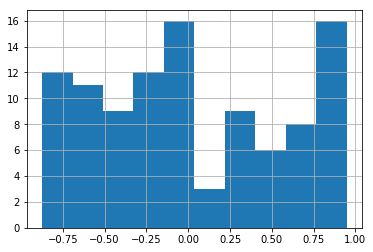

In [48]:
df_wireless_bad['compound_score'].hist()

Text(0, 0.5, 'Number of reviews')

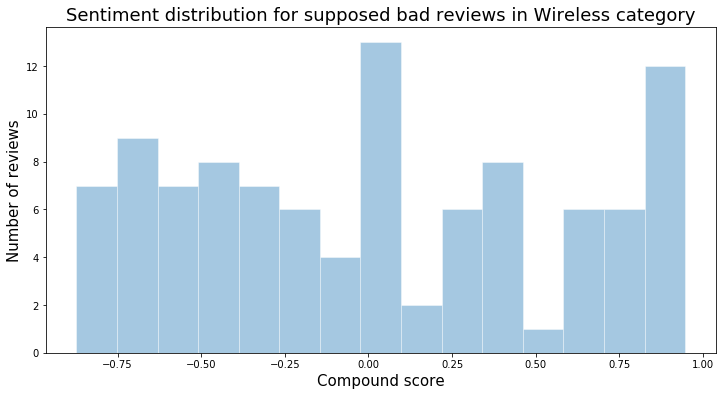

In [64]:
#Plot with seaborn
sentiment2 = plt.figure(figsize=(12,6))
ax = sns.distplot(df_wireless_bad['compound_score'], kde = False, bins=15, hist_kws=dict(edgecolor="w", linewidth=1))
#ax.set(xlabel='Compound score', ylabel='Number of reviews', 
#       title='Sentiment distribution for supposed bad reviews in Wireless category')

ax.axes.set_title("Sentiment distribution for supposed bad reviews in Wireless category",fontsize=18)
ax.set_xlabel("Compound score",fontsize=15)
ax.set_ylabel("Number of reviews",fontsize=15)

In [ ]:
sentiment1 = plt.figure()
ax = sns.distplot(df_wireless['compound_score'], kde=False)
ax.set(xlabel='Sentiment compound score', ylabel='Number of reviews', title='Sentiment distribution for Wireless category')
plt.figure(figsize=(10,6))

###### Final figure

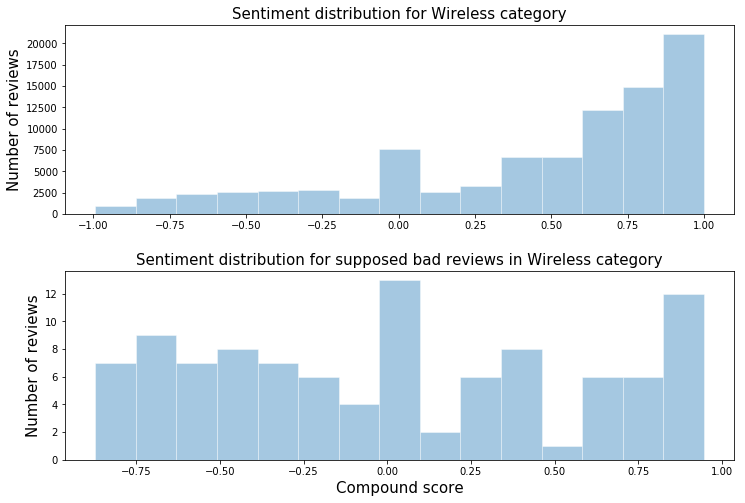

In [77]:
#Figure
fig_sentiment = plt.figure(figsize=(12,8))

# Divide the figure into a 2x1 grid, and give me the first section
ax_1 = fig_sentiment.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax_2 = fig_sentiment.add_subplot(212)


sns.distplot(df_wireless_sampled['compound_score'], ax=ax_1, kde = False, bins=15, hist_kws=dict(edgecolor="w", linewidth=1))
#ax.set(xlabel='Compound score', ylabel='Number of reviews', 
#       title='Sentiment distribution for supposed bad reviews in Wireless category')

ax_1.axes.set_title("Sentiment distribution for Wireless category",fontsize=15)
ax_1.set_xlabel("",fontsize=15)
ax_1.set_ylabel("Number of reviews",fontsize=15)

sns.distplot(df_wireless_bad['compound_score'], ax=ax_2, kde = False, bins=15, hist_kws=dict(edgecolor="w", linewidth=1))
#ax.set(xlabel='Compound score', ylabel='Number of reviews', 
#       title='Sentiment distribution for supposed bad reviews in Wireless category')

ax_2.axes.set_title("Sentiment distribution for supposed bad reviews in Wireless category",fontsize=15)
ax_2.set_xlabel("Compound score",fontsize=15)
ax_2.set_ylabel("Number of reviews",fontsize=15)

fig_sentiment.subplots_adjust(hspace=0.3)






In [78]:
#Save figure
fig_sentiment.savefig("sentiment.png")